In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
print('libraries imported')

libraries imported


In [2]:
fname = '/private/icg140/SAPHIR2018/FM_PTR_BrCIMS_INP_ISOP.csv'
df = pd.read_csv(fname, sep=',', parse_dates=["time"])
print(df.head())
df.columns = ['Index', 'Datetime', 'PTR_INP (ppb)', 'BrCIMS_INP (norm counts)', 'ISOP', 'FM_INP (norm counts)'] 
df['days'] = pd.DatetimeIndex(df['Datetime']).day
df.head()

   Unnamed: 0                time  INP_v    INP_Br  ISOP  Peak_INP
0           0 2018-08-09 00:00:30    NaN  0.001230   NaN       NaN
1           1 2018-08-09 00:01:30    NaN  0.001243   NaN       NaN
2           2 2018-08-09 00:02:30    NaN  0.001184   NaN       NaN
3           3 2018-08-09 00:03:30    NaN  0.001194   NaN       NaN
4           4 2018-08-09 00:04:30    NaN  0.001156   NaN       NaN


,Index,Datetime,PTR_INP (ppb),BrCIMS_INP (norm counts),ISOP,FM_INP (norm counts),days
0,0,2018-08-09 00:00:30,NaN,0.001230,NaN,NaN,9
1,1,2018-08-09 00:01:30,NaN,0.001243,NaN,NaN,9
2,2,2018-08-09 00:02:30,NaN,0.001184,NaN,NaN,9
3,3,2018-08-09 00:03:30,NaN,0.001194,NaN,NaN,9
4,4,2018-08-09 00:04:30,NaN,0.001156,NaN,NaN,9


/home/icg1/icg140/anaconda2/envs/stats/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


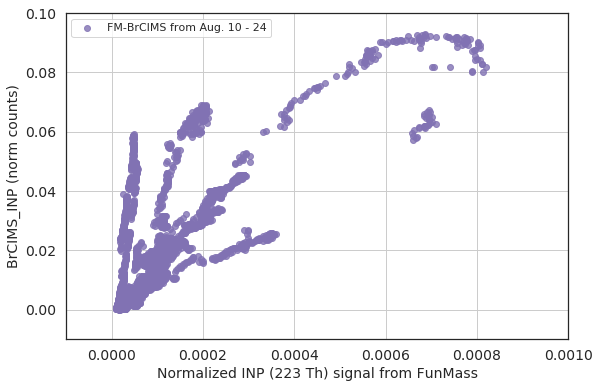

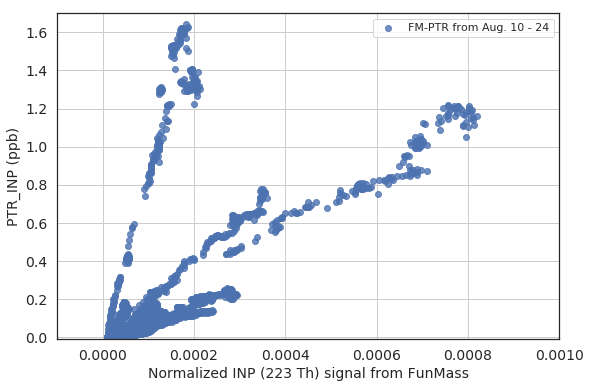

In [3]:
dt = df[(df['days']>=10)]
dt.dropna(axis=0, inplace=True)
# x = dt['FM_INP (norm counts)'].values.reshape(-1,1)
# y = dt['BrCIMS_INP (norm counts)'].values.reshape(-1,1)
# lmreg = LinearRegression() 
# lmreg.fit(x, y)
# print(lmreg.intercept_)
# print(lmreg.coef_)
fig = plt.figure(figsize=(9,6))
sns.set(style='white')
g = sns.regplot(x='FM_INP (norm counts)', y='BrCIMS_INP (norm counts)', data=dt, color="m", fit_reg=False)
plt.ylabel('BrCIMS_INP (norm counts)', fontsize=14)
plt.xlabel('Normalized INP (223 Th) signal from FunMass', fontsize=14)
plt.tick_params(labelsize=14)
plt.grid()
plt.minorticks_on()
plt.xlim(-0.0001, 0.001)
plt.ylim(-0.01, 0.1)
plt.legend(['FM-BrCIMS from Aug. 10 - 24'])
plt.show()

fig = plt.figure(figsize=(9,6))
sns.set(style='white')
g = sns.regplot(x='FM_INP (norm counts)', y='PTR_INP (ppb)', data=dt, color="b", fit_reg=False)
plt.ylabel('PTR_INP (ppb)', fontsize=14)
plt.xlabel('Normalized INP (223 Th) signal from FunMass', fontsize=14)
plt.tick_params(labelsize=14)
plt.grid()
plt.minorticks_on()
plt.xlim(-0.0001, 0.001)
plt.ylim(-0.01, 1.7)
plt.legend(['FM-PTR from Aug. 10 - 24'])
plt.show()

#### The initial concentration of reactants:

| Date | Isoprene (ppb) |  NO2 (ppb) | O3 (ppb) | H2O (%) | CO (ppb) |
|------|------|------|------|------|------|
| 2018. 08. 13  | 5 | 12 - 23 | 75 - 110 | 0 |------|
| 2018. 08. 14  | 11 | 13 - 22 | 70 - 110 | 0.01 |------|
| 2018. 08. 15  | 7 | 8 - 21 | 80 - 115 |1.3 - 2 |------|
| 2018. 08. 16  | 2.5 | 2 - 5 | 80 - 115 |1.6 |20|
| 2018. 08. 19  | 2.3 | 0 - 20 | 0 - 110 |0.07| 8 |

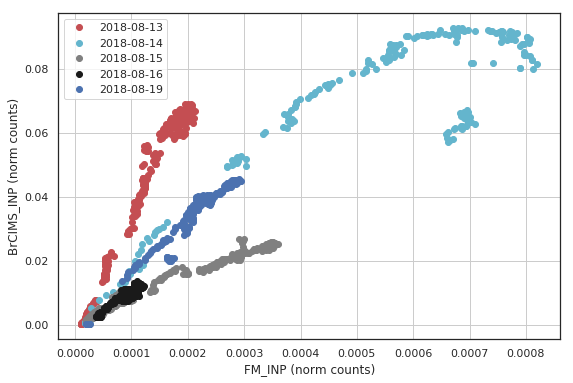

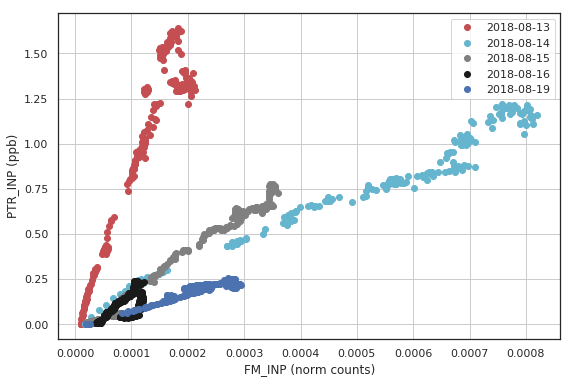

In [6]:
days = [13, 14, 15, 16, 19]
colors = ['r', 'c', 'grey', 'k', 'b']
sns.set(style='white')
fig, ax = plt.subplots(figsize=(9,6))
for i, day in enumerate(days):
    humid = dt[dt['days']==day]
    plt.plot(humid['FM_INP (norm counts)'], humid['BrCIMS_INP (norm counts)'], marker='o', lw=0, c=colors[i], label='2018-08-'+str(day))
ax.set_xlabel('FM_INP (norm counts)')
ax.set_ylabel('BrCIMS_INP (norm counts)')
plt.legend()
plt.grid()
plt.show()


days = [13, 14, 15, 16, 19]
colors = ['r', 'c', 'grey', 'k', 'b']
sns.set(style='white')
fig, ax = plt.subplots(figsize=(9,6))
for i, day in enumerate(days):
    humid = dt[dt['days']==day]
    plt.plot(humid['FM_INP (norm counts)'], humid['PTR_INP (ppb)'], marker='o', lw=0, c=colors[i], label='2018-08-'+str(day))
ax.set_xlabel('FM_INP (norm counts)')
ax.set_ylabel('PTR_INP (ppb)')
plt.legend()
plt.grid()
plt.show()

### 2018-8-13

| Date | Isoprene (ppb) |  NO2 (ppb) | O3 (ppb) | H2O (%) | CO (ppb) |
|------|------|------|------|------|------|
| 2018. 08. 13  | 8 | 12 - 23 | 75 - 110 | 0 |------|

![](/notebooks/stats/20180813.png "ShowMyImage")
![](/notebooks/stats/20180813_MS.png "ShowMyImage")

day = 13


/home/icg1/icg140/anaconda2/envs/stats/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[-0.00142042]
[[357.49943033]]


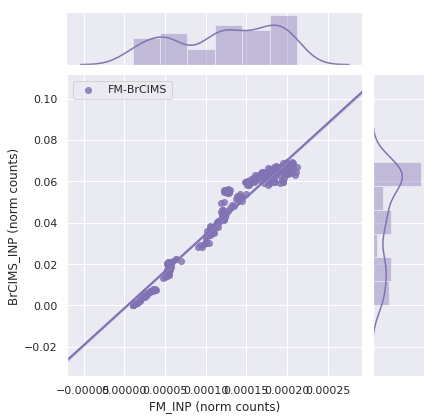

[0.0761582]
[[7339.032772]]


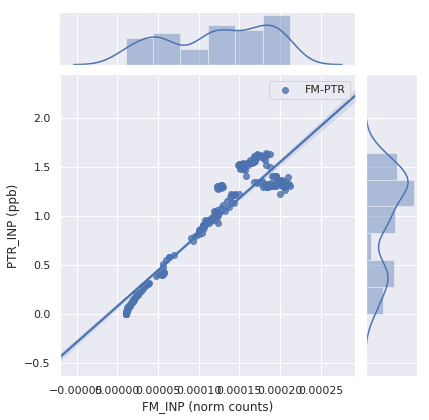

In [7]:
humid = dt[dt['days'] == int(raw_input('day = '))]

sns.set()
humid.dropna(axis=0, inplace=True)
x = humid['FM_INP (norm counts)'].values.reshape(-1,1)
y = humid['BrCIMS_INP (norm counts)'].values.reshape(-1,1)
lmreg = LinearRegression() 
lmreg.fit(x, y)
print(lmreg.intercept_)
print(lmreg.coef_)
g = sns.jointplot(x='FM_INP (norm counts)', y='BrCIMS_INP (norm counts)', data=humid, kind="reg", color="m", label='FM-BrCIMS')
plt.legend()
plt.show()

x = humid['FM_INP (norm counts)'].values.reshape(-1,1)
y = humid['PTR_INP (ppb)'].values.reshape(-1,1)
lmreg = LinearRegression() 
lmreg.fit(x, y)
print(lmreg.intercept_)
print(lmreg.coef_)
g = sns.jointplot(x='FM_INP (norm counts)', y='PTR_INP (ppb)', data=humid, kind="reg", color="b", label='FM-PTR')
plt.legend()
plt.show()

### 2018-8-14

| Date | Isoprene (ppb) |  NO2 (ppb) | O3 (ppb) | H2O (%) | CO (ppb) |
|------|------|------|------|------|------|
| 2018. 08. 14  | 11 | 13 - 22 | 70 - 110 | 0.01 |------|

![](/notebooks/stats/20180814.png "ShowMyImage")
![](/notebooks/stats/20180814_MS.png "ShowMyImage")

/home/icg1/icg140/anaconda2/envs/stats/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[0.00277839]
[[119.88812383]]


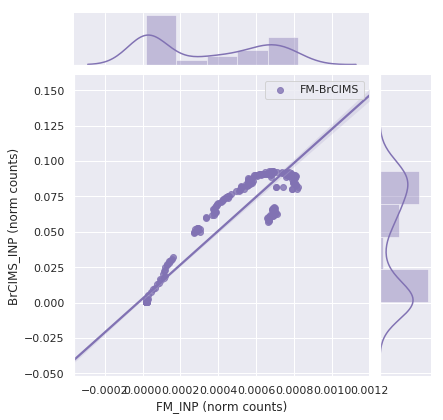

[-0.01128944]
[[1466.11760589]]


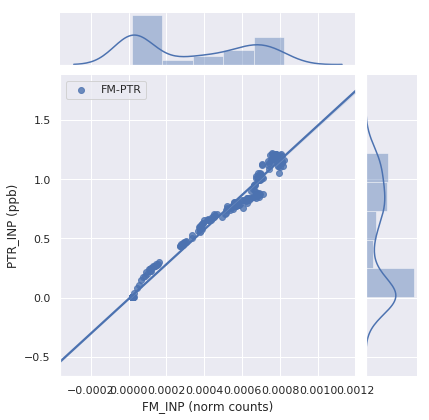

In [8]:
humid = dt[(dt['days'] == 14)]

sns.set()
humid.dropna(axis=0, inplace=True)
x = humid['FM_INP (norm counts)'].values.reshape(-1,1)
y = humid['BrCIMS_INP (norm counts)'].values.reshape(-1,1)
lmreg = LinearRegression() 
lmreg.fit(x, y)
print(lmreg.intercept_)
print(lmreg.coef_)
g = sns.jointplot(x='FM_INP (norm counts)', y='BrCIMS_INP (norm counts)', data=humid, kind="reg", color="m", label='FM-BrCIMS')
plt.legend()
plt.show()

x = humid['FM_INP (norm counts)'].values.reshape(-1,1)
y = humid['PTR_INP (ppb)'].values.reshape(-1,1)
lmreg = LinearRegression() 
lmreg.fit(x, y)
print(lmreg.intercept_)
print(lmreg.coef_)
g = sns.jointplot(x='FM_INP (norm counts)', y='PTR_INP (ppb)', data=humid, kind="reg", color="b", label='FM-PTR')
plt.legend()
plt.show()

### 2018-8-19

| Date | Isoprene (ppb) |  NO2 (ppb) | O3 (ppb) | H2O (%) | CO (ppb) |
|------|------|------|------|------|------|
| 2018. 08. 19  | 2.3 | 0 - 20 | 0 - 110 |0.07| 8 |

![](/notebooks/stats/20180819.png "ShowMyImage")
![](/notebooks/stats/20180819_MS.png "ShowMyImage")

/home/icg1/icg140/anaconda2/envs/stats/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[-0.00258694]
[[172.99445711]]


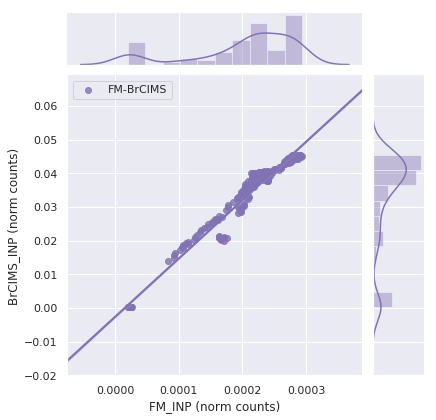

[-0.01017664]
[[905.91206506]]


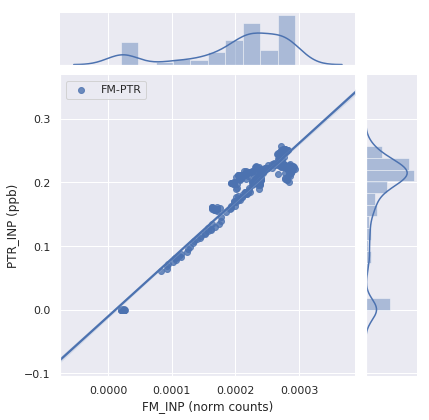

In [9]:
humid = dt[(dt['days'] == 19)]

sns.set()
humid.dropna(axis=0, inplace=True)
x = humid['FM_INP (norm counts)'].values.reshape(-1,1)
y = humid['BrCIMS_INP (norm counts)'].values.reshape(-1,1)
lmreg = LinearRegression() 
lmreg.fit(x, y)
print(lmreg.intercept_)
print(lmreg.coef_)
g = sns.jointplot(x='FM_INP (norm counts)', y='BrCIMS_INP (norm counts)', data=humid, kind="reg", color="m", label='FM-BrCIMS')
plt.legend()
plt.show()

x = humid['FM_INP (norm counts)'].values.reshape(-1,1)
y = humid['PTR_INP (ppb)'].values.reshape(-1,1)
lmreg = LinearRegression() 
lmreg.fit(x, y)
print(lmreg.intercept_)
print(lmreg.coef_)
g = sns.jointplot(x='FM_INP (norm counts)', y='PTR_INP (ppb)', data=humid, kind="reg", color="b", label='FM-PTR')
plt.legend()
plt.show()